# Data Loading
Load the MNIST dataset using Keras.

In [106]:
# import Necessary Libraries
from tensorflow.keras.datasets import mnist
from keras import Sequential#generic model used in dl
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [107]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [108]:
y_train[0]


np.uint8(5)

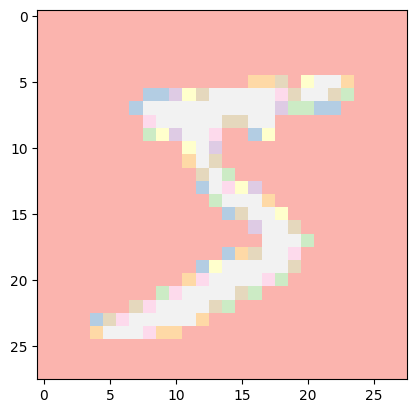

In [109]:
plt.imshow(x_train[0], cmap="Pastel1")
plt.show()

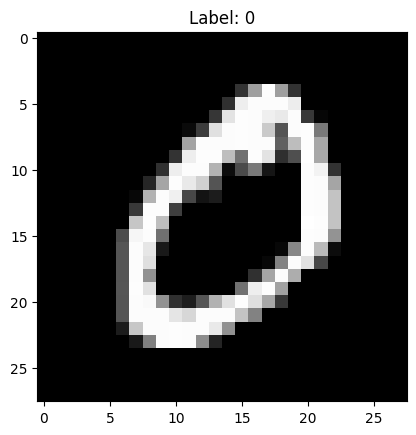

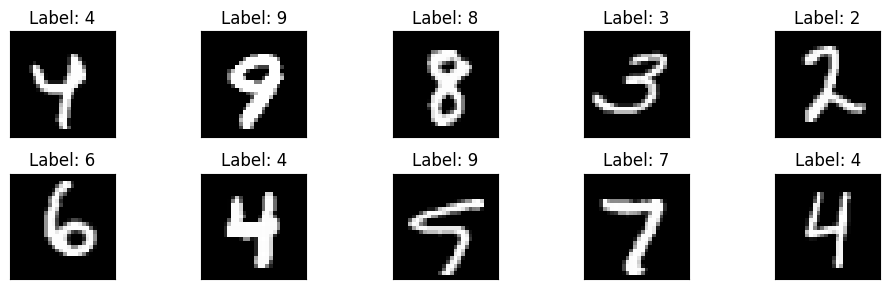

In [110]:
# Basic data visualisation
img = x_train[1,:,:]
label = y_train[1]
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.show()
# Basic data visualisation

plt.figure(figsize=(10, 3))

wind = 1

for i in np.random.randint(0, 60000, 10):

  plt.subplot(2, 5, wind)

  plt.imshow(x_train[i], cmap='gray')

  plt.title(f"Label: {y_train[i]}")

  plt.xticks([])

  plt.yticks([])

  wind += 1

plt.tight_layout()

plt.show()

# Data Preprocessing
Normalize the data and reshape it for CNN input.

In [111]:
np.max(x_train[0])
np.uint8(255)

np.uint8(255)

In [112]:
x_train.shape

(60000, 28, 28)

In [113]:
np.max(x_train.reshape(-1, 28, 28, 1).astype('float16')/255)

np.float16(1.0)

In [114]:
np.max(x_train.reshape(-1, 28, 28, 2).astype('float16')/255)

np.float16(1.0)

In [115]:
x_train.reshape(-1, 28, 28, 2).astype('float16')

array([[[[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [247., 127.],
         [  0.,   0.],
         [  0.,   0.]],

        ...,

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]]],


       [[[  0.,   0.],
         [  0.,   0.],
         [  0.

In [116]:
# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [117]:
int(y_train[3])

1

In [118]:
y_train_cat[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

# Model Building
Build a CNN model using Keras Sequential API.

In [119]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,202 (891.41 KB)

 Trainable params: 228,202 (891.41 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation
Compile the model with Adam optimizer and categorical crossentropy loss.

In [120]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
Train the model on the training data.

In [121]:
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6530 - loss: 1.0267 - val_accuracy: 0.9751 - val_loss: 0.0867
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9249 - loss: 0.2427 - val_accuracy: 0.9785 - val_loss: 0.0743
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9505 - loss: 0.1662 - val_accuracy: 0.9868 - val_loss: 0.0536
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9616 - loss: 0.1237 - val_accuracy: 0.9855 - val_loss: 0.0586
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9690 - loss: 0.1010 - val_accuracy: 0.9878 - val_loss: 0.0518


# Model Evaluation
Evaluate the model on the test data.

In [122]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

# Prediction
Make predictions on new data samples.

In [ ]:
# Predict on a few test samples
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

# Display predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.show()